In [2]:
import xarray as xr
import numpy as np
import cmocean

In [3]:
OUTPUT_FILES = {
    "snapshot": "4deg.snapshot.nc",
    "averages": "4deg.averages.nc",
    "overturning": "4deg.overturning.nc",
    "energy": "4deg.energy.nc",
}

In [4]:
ds_avg = xr.open_dataset("4deg/" + OUTPUT_FILES["averages"])
ds_avg

<xarray.Dataset>
Dimensions:       (Time: 10, isle: 6, nmonths: 12, yu: 40, xu: 90, zt: 15,
                   yt: 40, xt: 90, tensor1: 2, tensor2: 2, zw: 15)
Coordinates:
  * Time          (Time) timedelta64[ns] 32760 days 33120 days ... 36000 days
  * isle          (isle) float64 0.0 1.0 2.0 3.0 4.0 5.0
  * nmonths       (nmonths) float64 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * tensor1       (tensor1) float64 0.0 1.0
  * tensor2       (tensor2) float64 0.0 1.0
  * xt            (xt) float64 2.0 6.0 10.0 14.0 ... 346.0 350.0 354.0 358.0
  * xu            (xu) float64 4.0 8.0 12.0 16.0 ... 348.0 352.0 356.0 360.0
  * yt            (yt) float64 -78.0 -74.0 -70.0 -66.0 ... 66.0 70.0 74.0 78.0
  * yu            (yu) float64 -76.0 -72.0 -68.0 -64.0 ... 68.0 72.0 76.0 80.0
  * zt            (zt) float64 -4.855e+03 -4.165e+03 -3.575e+03 ... -65.0 -35.0
  * zw            (zw) float64 -4.51e+03 -3.87e+03 -3.28e+03 ... -50.0 0.0
Data variables:
    psi           (Time, yu, xu) float64 ...
    salt          (Time, zt, yt, xt) float64 ...
    surface_taux  (Time, yt, xu) float64 ...
    surface_tauy  (Time, yu, xt) float64 ...
    temp          (Time, zt, yt, xt) float64 ...
    u             (Time, zt, yt, xu) float64 ...
    v             (Time, zt, yu, xt) float64 ...
    w             (Time, zw, yt, xt) float64 ...
Attributes:
    date_created:      2021-10-26T12:02:31.193084
    veros_version:     1.4.2
    setup_identifier:  4deg
    history:           Thu Oct 28 16:05:51 2021: ncks -d Time,90,99 4deg.aver...
    NCO:               netCDF Operators version 4.8.0 (Homepage = http://nco....

In [6]:
# Convert units of the barotropic stream function
ds_avg["psi"] = ds_avg.psi / 1e6
ds_avg["psi"].attrs["units"] = "Sv"

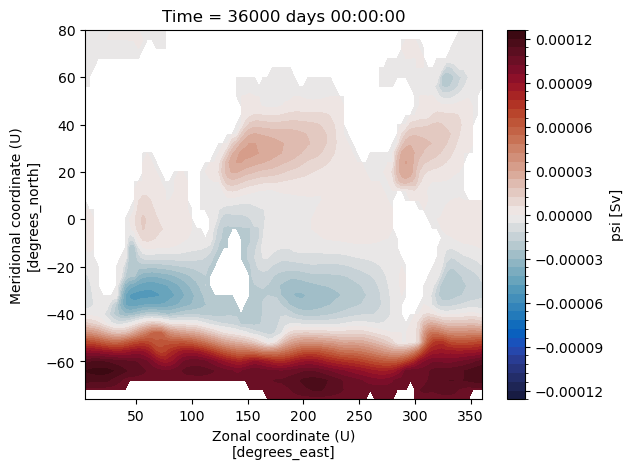

In [8]:
# Plot last time snapshot of psi
ds_avg["psi"].isel(Time=-1).plot.contourf(levels=50, cmap="cmo.balance")

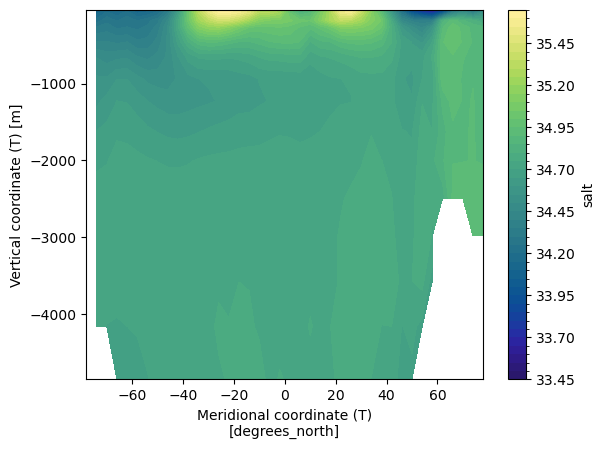

In [10]:
# Compute the decadal mean (of the last 10yrs) of zonal-mean ocean salinity
ds_avg["salt"].isel(Time=slice(-10,None)).mean(dim=("Time", "xt")).plot.contourf(levels=50, cmap="cmo.haline")

In [12]:
ds_snap = xr.open_dataset("4deg/" + OUTPUT_FILES["snapshot"])
# Use cell area as weights, replace missing values (land) with 0
weights = ds_snap["area_t"].fillna(0)

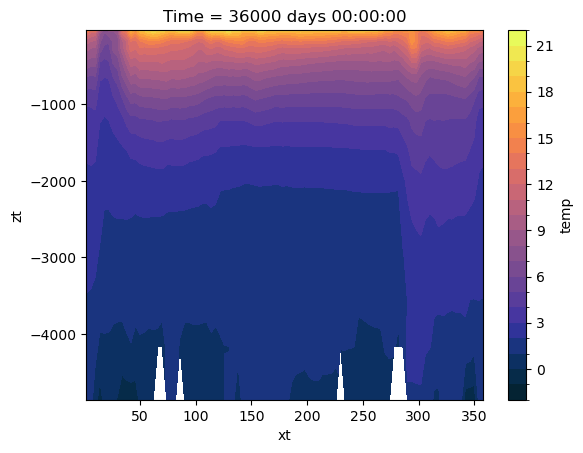

In [13]:
# Calculate and plot the meridional mean temperature
temp_weighted = (
    ds_avg["temp"]
    .isel(Time=-1)
    .weighted(weights)
    .mean(dim="yt")
    .plot.contourf(vmin=-2, vmax=22, levels=25, cmap="cmo.thermal")
)